In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
import numpy as np

In [2]:
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
gen_data = pd.read_csv('Plant_1_Generation_Data.csv')

In [3]:
weather_data['DATE_TIME']= pd.to_datetime(weather_data['DATE_TIME'])
gen_data['DATE_TIME']= pd.to_datetime(gen_data['DATE_TIME'], format='%d-%m-%Y %H:%M')

In [4]:
# Daily maximum irradiation, module and ambient temp
agg_df = weather_data.set_index('DATE_TIME').resample('D').agg({'IRRADIATION': 'max',
                                                                'MODULE_TEMPERATURE': 'max',
                                                               'AMBIENT_TEMPERATURE': 'max'})
agg_df['DAY'] = pd.DatetimeIndex(agg_df.index).dayofyear
agg_df.head()

IRRADIATION  MODULE_TEMPERATURE  AMBIENT_TEMPERATURE  DAY
DATE_TIME                                                            
2020-05-15     0.893661           55.030613            34.430943  136
2020-05-16     0.812241           54.232746            32.524149  137
2020-05-17     0.997904           63.145582            35.252486  138
2020-05-18     0.971481           53.936739            28.367100  139
2020-05-19     0.835832           51.847742            30.368632  140

In [5]:
weather_data['DAY'] = pd.DatetimeIndex(weather_data['DATE_TIME']).dayofyear
weather_data['TIME'] = weather_data.DATE_TIME.dt.hour * 60 + weather_data.DATE_TIME.dt.minute
weather_data['HOUR'] = weather_data.DATE_TIME.dt.hour
weather_data.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1 2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2 2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3 2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4 2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  DAY  TIME  HOUR  
0           22.857507          0.0  136     0     0  
1           22.761668          0.0  136    15     0  
2           22.592306          0.0  136    30     0  
3           22.360852          0.0  136    45     0  
4           22.165423          0.0  136    60     1

In [6]:
gen_data['DAY'] = pd.DatetimeIndex(gen_data['DATE_TIME']).dayofyear
gen_data['TIME'] = gen_data.DATE_TIME.dt.hour * 60 + weather_data.DATE_TIME.dt.minute
gen_data['HOUR'] = gen_data.DATE_TIME.dt.hour
gen_data.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD  DAY  TIME  HOUR  
0    6259559.0  136   0.0     0  
1    6183645.0  136  15.0     0  
2    6987759.0  136  30.0     0  
3    7602960.0  136  45.0     0  
4    7158964.0  136   0.0     0

In [7]:
#Hourly maximum irradiation, module and ambient temp
agg_h_irr = weather_data.groupby(weather_data.TIME).agg({'IRRADIATION': 'max',
                                                            'MODULE_TEMPERATURE': 'max',
                                                            'AMBIENT_TEMPERATURE': 'max'})
agg_h_irr.head()

IRRADIATION  MODULE_TEMPERATURE  AMBIENT_TEMPERATURE
TIME                                                      
0             0.0           22.857507            25.184316
15            0.0           22.761668            25.084589
30            0.0           22.666227            24.935753
45            0.0           22.743333            24.846130
60            0.0           22.723669            24.621525

In [8]:
agg__irr = weather_data.groupby(weather_data.HOUR).agg({'IRRADIATION': 'max',
                                                            'MODULE_TEMPERATURE': 'max',
                                                            'AMBIENT_TEMPERATURE': 'max'})
agg__irr.head()

IRRADIATION  MODULE_TEMPERATURE  AMBIENT_TEMPERATURE
HOUR                                                      
0             0.0           22.857507            25.184316
1             0.0           23.160919            24.873022
2             0.0           24.039486            25.012248
3             0.0           24.384136            25.016309
4             0.0           22.589942            24.678902

In [9]:
merged_df = pd.merge(gen_data, weather_data, how='inner', on=['DATE_TIME'])
merged_df

DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  \
0     2020-05-15 00:00:00     4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1     2020-05-15 00:00:00     4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2     2020-05-15 00:00:00     4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3     2020-05-15 00:00:00     4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4     2020-05-15 00:00:00     4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                   ...         ...              ...       ...       ...   
68769 2020-06-17 23:45:00     4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68770 2020-06-17 23:45:00     4135001  wCURE6d3bPkepu2       0.0       0.0   
68771 2020-06-17 23:45:00     4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68772 2020-06-17 23:45:00     4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68773 2020-06-17 23:45:00     4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  DAY_x  TIME_x  HOUR_x  PLANT_ID_y  \
0            0.000    6259559.0    136     0.0       0     4135001   
1            0.000    6183645.0    136    15.0       0     4135001   
2            0.000    6987759.0    136    30.0       0     4135001   
3            0.000    7602960.0    136    45.0       0     4135001   
4            0.000    7158964.0    136     0.0       0     4135001   
...            ...          ...    ...     ...     ...         ...   
68769     5967.000    7287002.0    169     NaN      23     4135001   
68770     5147.625    7028601.0    169     NaN      23     4135001   
68771     5819.000    7251204.0    169     NaN      23     4135001   
68772     5817.000    6583369.0    169     NaN      23     4135001   
68773     5910.000    7363272.0    169     NaN      23     4135001   

          SOURCE_KEY_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
0      HmiyD2TTLFNqkNe            25.184316           22.857507          0.0   
1      HmiyD2TTLFNqkNe            25.184316           22.857507          0.0   
2      HmiyD2TTLFNqkNe            25.184316           22.857507          0.0   
3      HmiyD2TTLFNqkNe            25.184316           22.857507          0.0   
4      HmiyD2TTLFNqkNe            25.184316           22.857507          0.0   
...                ...                  ...                 ...          ...   
68769  HmiyD2TTLFNqkNe            21.909288           20.427972          0.0   
68770  HmiyD2TTLFNqkNe            21.909288           20.427972          0.0   
68771  HmiyD2TTLFNqkNe            21.909288           20.427972          0.0   
68772  HmiyD2TTLFNqkNe            21.909288           20.427972          0.0   
68773  HmiyD2TTLFNqkNe            21.909288           20.427972          0.0   

       DAY_y  TIME_y  HOUR_y  
0        136       0       0  
1        136       0       0  
2        136       0       0  
3        136       0       0  
4        136       0       0  
...      ...     ...     ...  
68769    169    1425      23  
68770    169    1425      23  
68771    169    1425      23  
68772    169    1425      23  
68773    169    1425      23  

[68774 rows x 18 columns]

# Topic 1. Cloudiness measure

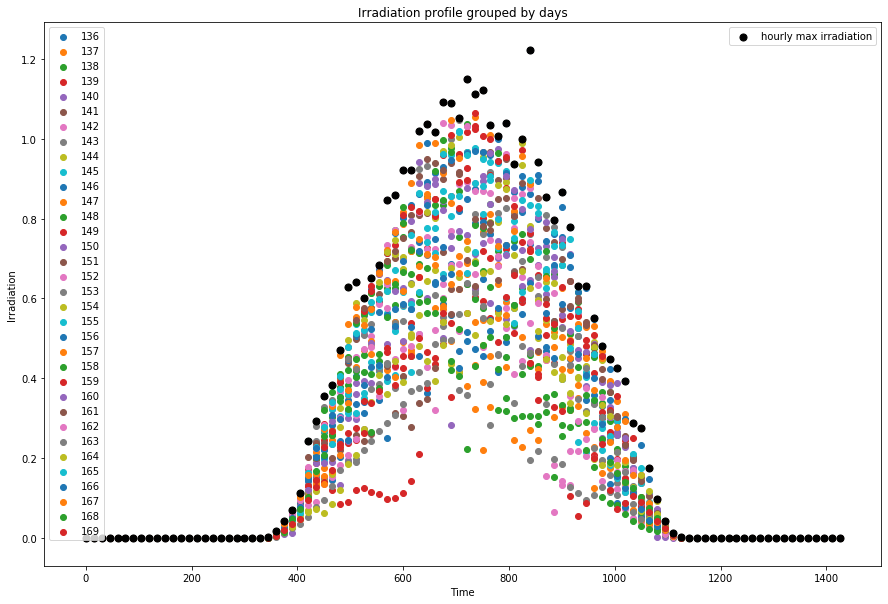

In [10]:
ax=plt.figure(figsize=(15, 10))
for a, b in weather_data.groupby(weather_data['DAY']):
    n=[plt.scatter(b['TIME'], b['IRRADIATION'])]
m=[plt.scatter(agg_h_irr.index, agg_h_irr['IRRADIATION'], color='black', s=50)]
legend1 = plt.legend(agg_df['DAY'], loc='upper left')
legend2 = plt.legend(m,['hourly max irradiation'], loc='upper right')
ax.add_artist(legend1)
plt.ylabel('Irradiation')
plt.xlabel('Time')
plt.title('Irradiation profile grouped by days')
plt.show()

### Check whether C_day or correlation actually reflect the more cloudy or less cloudy behaviour of irradiation profile. Do some manual checks for the most and least cloudy days according to correlation and according to C_day. Choose which one represents better a cloudy day and explain why.

In [11]:
weather_maxirr = pd.merge(weather_data, agg_h_irr, how='inner', on='TIME', suffixes=('', '_max'))
weather_maxirr.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15   4135001  HmiyD2TTLFNqkNe            25.184316   
1 2020-05-17   4135001  HmiyD2TTLFNqkNe            24.170166   
2 2020-05-18   4135001  HmiyD2TTLFNqkNe            21.155691   
3 2020-05-19   4135001  HmiyD2TTLFNqkNe            22.610982   
4 2020-05-20   4135001  HmiyD2TTLFNqkNe            22.465285   

   MODULE_TEMPERATURE  IRRADIATION  DAY  TIME  HOUR  IRRADIATION_max  \
0           22.857507          0.0  136     0     0              0.0   
1           21.631490          0.0  138     0     0              0.0   
2           20.599400          0.0  139     0     0              0.0   
3           20.609906          0.0  140     0     0              0.0   
4           20.111123          0.0  141     0     0              0.0   

   MODULE_TEMPERATURE_max  AMBIENT_TEMPERATURE_max  
0               22.857507                25.184316  
1               22.857507                25.184316  
2               22.857507                25.184316  
3               22.857507                25.184316  
4               22.857507                25.184316

In [12]:
weather_maxirr['irradiation_offset_from_max']=(weather_maxirr['IRRADIATION_max']-weather_maxirr['IRRADIATION'])**2.
C_day_list=weather_maxirr.groupby('DAY').sum()['irradiation_offset_from_max']

In [13]:
weather_maxirr = pd.merge(weather_maxirr, C_day_list, how='inner', on='DAY')
weather_maxirr_new = weather_maxirr.rename(columns={'irradiation_offset_from_max_y': 'C_day', 'irradiation_offset_from_max_x': 'irradiation_offset_from_max'})
weather_maxirr_new

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0    2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1    2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2    2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3    2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4    2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   
...                  ...       ...              ...                  ...   
3177 2020-05-16 22:45:00   4135001  HmiyD2TTLFNqkNe            24.492981   
3178 2020-05-16 23:00:00   4135001  HmiyD2TTLFNqkNe            24.461625   
3179 2020-05-16 23:15:00   4135001  HmiyD2TTLFNqkNe            24.392568   
3180 2020-05-16 23:30:00   4135001  HmiyD2TTLFNqkNe            24.378021   
3181 2020-05-16 23:45:00   4135001  HmiyD2TTLFNqkNe            24.249347   

      MODULE_TEMPERATURE  IRRADIATION  DAY  TIME  HOUR  IRRADIATION_max  \
0              22.857507          0.0  136     0     0              0.0   
1              22.761668          0.0  136    15     0              0.0   
2              22.592306          0.0  136    30     0              0.0   
3              22.360852          0.0  136    45     0              0.0   
4              22.165423          0.0  136    60     1              0.0   
...                  ...          ...  ...   ...   ...              ...   
3177           22.052697          0.0  137  1365    22              0.0   
3178           22.186352          0.0  137  1380    23              0.0   
3179           22.202924          0.0  137  1395    23              0.0   
3180           22.112622          0.0  137  1410    23              0.0   
3181           21.814211          0.0  137  1425    23              0.0   

      MODULE_TEMPERATURE_max  AMBIENT_TEMPERATURE_max  \
0                  22.857507                25.184316   
1                  22.761668                25.084589   
2                  22.666227                24.935753   
3                  22.743333                24.846130   
4                  22.723669                24.621525   
...                      ...                      ...   
3177               23.560189                25.810259   
3178               23.815649                25.312602   
3179               23.300472                24.969698   
3180               23.077228                24.838093   
3181               23.051286                24.818829   

      irradiation_offset_from_max     C_day  
0                             0.0  5.856702  
1                             0.0  5.856702  
2                             0.0  5.856702  
3                             0.0  5.856702  
4                             0.0  5.856702  
...                           ...       ...  
3177                          0.0  5.654768  
3178                          0.0  5.654768  
3179                          0.0  5.654768  
3180                          0.0  5.654768  
3181                          0.0  5.654768  

[3182 rows x 14 columns]

In [14]:
#Replacing outliers with the value of C_day
clean_data=weather_maxirr_new.copy()
for i, j in  clean_data.groupby(clean_data.TIME):
    outlier_condition1=(j['IRRADIATION']!=0)&(j['IRRADIATION']>=(j['IRRADIATION'].mean()+ 3*j['IRRADIATION'].std()))
    outlier_condition2=(j['IRRADIATION']!=0)&(j['IRRADIATION']<(j['IRRADIATION'].mean()- 3*j['IRRADIATION'].std()))
    clean_data.loc[(clean_data['DAY'].isin(j.loc[outlier_condition1|outlier_condition2].DAY))&(clean_data['TIME']==i), 'IRRADIATION']=clean_data['C_day']

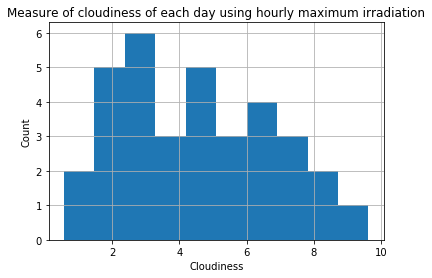

In [15]:
# plt.figure(figsize=(15, 10))
C_day_list.hist()
plt.ylabel('Count')
plt.xlabel('Cloudiness')
plt.title('Measure of cloudiness of each day using hourly maximum irradiation')
plt.show() 

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


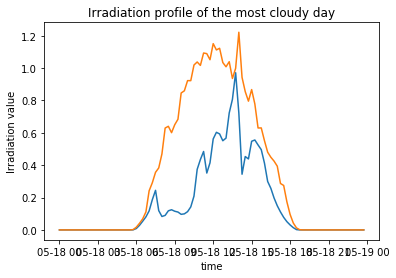

In [16]:
C_day_max= weather_maxirr_new[weather_maxirr_new.C_day==weather_maxirr_new.C_day.max()]
# plt.figure(figsize=(15, 10))
plt.plot(C_day_max.DATE_TIME,C_day_max.IRRADIATION)
plt.plot(C_day_max.DATE_TIME,C_day_max.IRRADIATION_max)
plt.ylabel('Irradiation value')
plt.xlabel('time')
plt.title('Irradiation profile of the most cloudy day')
plt.show() 

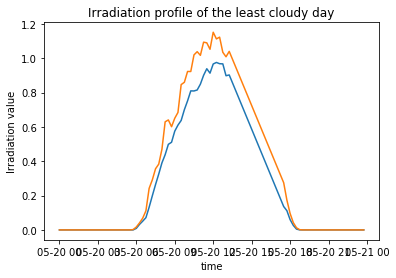

In [17]:
C_day_min= weather_maxirr_new[weather_maxirr_new.C_day==weather_maxirr_new.C_day.min()]
# plt.figure(figsize=(15, 10))
plt.plot(C_day_min.DATE_TIME,C_day_min.IRRADIATION)
plt.plot(C_day_min.DATE_TIME,C_day_min.IRRADIATION_max)
plt.ylabel('Irradiation value')
plt.xlabel('time')
plt.title('Irradiation profile of the least cloudy day')
plt.show() 

In [18]:
C_day_min[C_day_min.HOUR==15]

Empty DataFrame
Columns: [DATE_TIME, PLANT_ID, SOURCE_KEY, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION, DAY, TIME, HOUR, IRRADIATION_max, MODULE_TEMPERATURE_max, AMBIENT_TEMPERATURE_max, irradiation_offset_from_max, C_day]
Index: []

There is a lack of data on this day

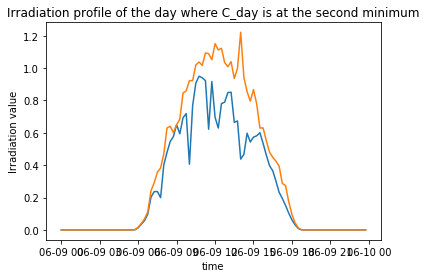

In [19]:
C_day_min_1= weather_maxirr_new[weather_maxirr_new.C_day<3]
C_day_min_1=C_day_min_1[C_day_min_1.C_day>2.75]
# plt.figure(figsize=(15, 10))
plt.plot(C_day_min_1.DATE_TIME,C_day_min_1.IRRADIATION)
plt.plot(C_day_min_1.DATE_TIME,C_day_min_1.IRRADIATION_max)
plt.ylabel('Irradiation value')
plt.xlabel('time')
plt.title('Irradiation profile of the day where C_day is at the second minimum')
plt.show() 

If we compare the irradiation profiles of the days where C_day is maximum and the second minimum, we can clearly see that, on the day where C_day is low, the irradiation almost perfectly rises and then drops. Whereas when the C_day is very high, we can see that there are fluctuations of the value of irradiation in the day, which was probably caused by the cloudiness of the day.

So we can understand that C_day does represent the cloudiness of the day.

#### Let's do the same with the correlation value of the irradiation profile of every day with the max curve.

In [20]:
irr_c = []
for a, b in weather_maxirr.groupby(weather_maxirr['DAY']):
    c = b['IRRADIATION'].corr(b['IRRADIATION_max'])
    irr_c.append(c)

irr_corr = pd.DataFrame(data=np.array(irr_c), columns=['CORRELATION'])
irr_corr['DAY'] = weather_data['DAY'].unique()

In [21]:
weather_and_corr=pd.merge(weather_maxirr,irr_corr, how='inner', on='DAY')
weather_and_corr.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1 2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2 2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3 2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4 2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  DAY  TIME  HOUR  IRRADIATION_max  \
0           22.857507          0.0  136     0     0              0.0   
1           22.761668          0.0  136    15     0              0.0   
2           22.592306          0.0  136    30     0              0.0   
3           22.360852          0.0  136    45     0              0.0   
4           22.165423          0.0  136    60     1              0.0   

   MODULE_TEMPERATURE_max  AMBIENT_TEMPERATURE_max  \
0               22.857507                25.184316   
1               22.761668                25.084589   
2               22.666227                24.935753   
3               22.743333                24.846130   
4               22.723669                24.621525   

   irradiation_offset_from_max_x  irradiation_offset_from_max_y  CORRELATION  
0                            0.0                       5.856702     0.949892  
1                            0.0                       5.856702     0.949892  
2                            0.0                       5.856702     0.949892  
3                            0.0                       5.856702     0.949892  
4                            0.0                       5.856702     0.949892

In [22]:
weather_and_corr.CORRELATION.unique()

array([0.94989165, 0.95861757, 0.85199971, 0.95368587, 0.99691734,
       0.95952105, 0.94723423, 0.97380578, 0.97903271, 0.98360286,
       0.93823629, 0.91016106, 0.97454889, 0.95892436, 0.91789378,
       0.90565414, 0.83744476, 0.93694054, 0.96205066, 0.96525579,
       0.90370393, 0.90453626, 0.95698241, 0.9753455 , 0.96176742,
       0.91295703, 0.95135545, 0.97335243, 0.98033042, 0.94455128,
       0.9025099 , 0.911771  , 0.92165086, 0.97130098])

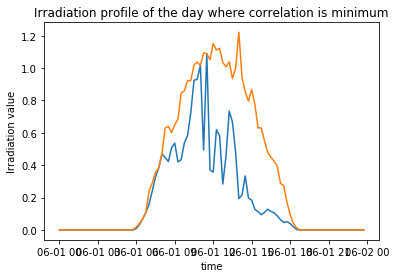

In [23]:
corr_min= weather_and_corr[weather_and_corr.CORRELATION==weather_and_corr.CORRELATION.min()]
# plt.figure(figsize=(15, 10))
plt.plot(corr_min.DATE_TIME,corr_min.IRRADIATION)
plt.plot(corr_min.DATE_TIME,corr_min.IRRADIATION_max)
plt.ylabel('Irradiation value')
plt.xlabel('time')
plt.title('Irradiation profile of the day where correlation is minimum')
plt.show() 

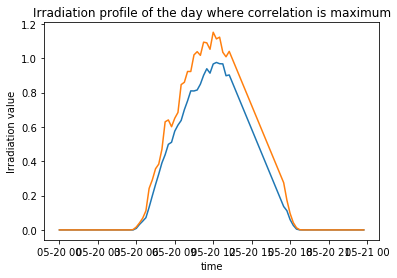

In [24]:
corr_max= weather_and_corr[weather_and_corr.CORRELATION==weather_and_corr.CORRELATION.max()]
# plt.figure(figsize=(15, 10))
plt.plot(corr_max.DATE_TIME,corr_max.IRRADIATION)
plt.plot(corr_max.DATE_TIME,corr_max.IRRADIATION_max)
plt.ylabel('Irradiation value')
plt.xlabel('time')
plt.title('Irradiation profile of the day where correlation is maximum')
plt.show() 

There are missing values on this day

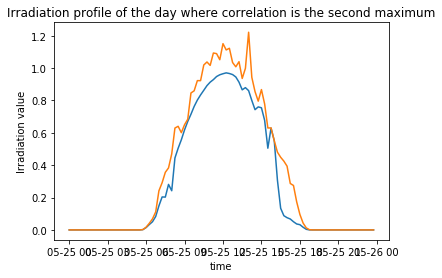

In [25]:
corr_max_1=weather_and_corr[weather_and_corr.CORRELATION<weather_and_corr.CORRELATION.max()]
corr_max_1=corr_max_1[corr_max_1.CORRELATION>0.983]
corr_max_1

# plt.figure(figsize=(15, 10))
plt.plot(corr_max_1.DATE_TIME,corr_max_1.IRRADIATION)
plt.plot(corr_max_1.DATE_TIME,corr_max_1.IRRADIATION_max)
plt.ylabel('Irradiation value')
plt.xlabel('time')
plt.title('Irradiation profile of the day where correlation is the second maximum')
plt.show() 

In the last plot, we can see that the curve of irradiation does not behave like the max curve, and if we compare the curves of the correlation with the curves of C_day, we can see that the irradiation curves of C_day behave similarly with the max curve. So it looks like C_day is a better way to measure the cloudiness of a day.

### Write a function that takes as input the weather data and outputs the same dataframe with another column showing the cloudiness measure (C_day or correlation depends on your choice in the step above).

In [26]:
def weather_data_cday(data):
    weather_data['DAY'] = pd.DatetimeIndex(weather_data['DATE_TIME']).dayofyear
    weather_data['TIME'] = weather_data.DATE_TIME.dt.time
    weather_data['HOUR'] = weather_data.DATE_TIME.dt.hour
    irr_max=data.groupby(data.DATE_TIME.dt.hour).agg({'IRRADIATION': 'max',
                                                     'MODULE_TEMPERATURE': 'max',
                                                      'AMBIENT_TEMPERATURE': 'max'})
    irr_max['HOUR']=irr_max.index
    data_irr_max=pd.merge(data,irr_max,how='inner', on='HOUR', suffixes=('', '_max'))
    C_Day=[]
    for a, b in data_irr_max.groupby(data_irr_max['DAY']):
        ind = b[b['DAY']==a].index.values
        C = (b.IRRADIATION_max-b.loc[ind, 'IRRADIATION'])**2
        C_day = C.sum()
        C_Day.append(C_day)
        C_DAY = pd.DataFrame(data=np.array(C_Day), columns=['C_day'])
    C_DAY['DAY'] = weather_data['DAY'].unique()
    weather_cday=pd.merge(data_irr_max, C_DAY, how='inner', on='DAY')
    return(weather_cday.head())

In [27]:
weather_data_cday(weather_data)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1 2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2 2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3 2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4 2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  DAY      TIME  HOUR  IRRADIATION_max  \
0           22.857507          0.0  136  00:00:00     0              0.0   
1           22.761668          0.0  136  00:15:00     0              0.0   
2           22.592306          0.0  136  00:30:00     0              0.0   
3           22.360852          0.0  136  00:45:00     0              0.0   
4           22.165423          0.0  136  01:00:00     1              0.0   

   MODULE_TEMPERATURE_max  AMBIENT_TEMPERATURE_max     C_day  
0               22.857507                25.184316  8.553528  
1               22.857507                25.184316  8.553528  
2               22.857507                25.184316  8.553528  
3               22.857507                25.184316  8.553528  
4               23.160919                24.873022  8.553528

## Check whether C_day or correlation actually reflect the more cloudy or less cloudy behaviour of module temperature profile. Do some manual checks for the most and least cloudy days according to correlation and according to C_day. Choose which one represents better a cloudy day and explain why.

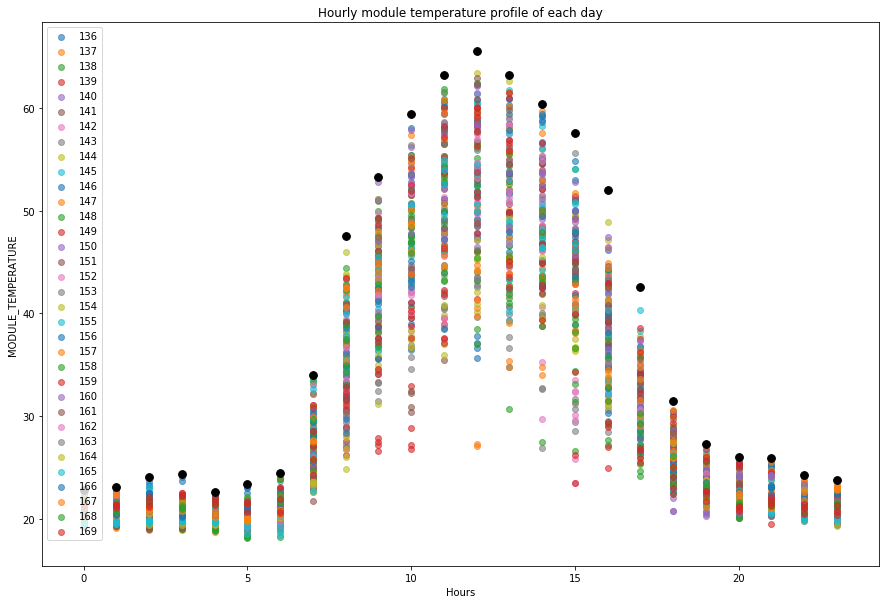

In [28]:
plt.figure(figsize=(15, 10))
for a, b in weather_data.groupby(weather_data['DAY']):
    plt.scatter(b['HOUR'], b['MODULE_TEMPERATURE'], alpha = 0.6)
plt.scatter(agg__irr.index, agg__irr['MODULE_TEMPERATURE'], color='black', s=60)
plt.legend(agg_df['DAY'])
plt.ylabel('MODULE_TEMPERATURE')
plt.xlabel('Hours')
plt.title('Hourly module temperature profile of each day')
plt.show()

In [29]:
weather_maxirr_new['mod_temp_offset_from_max']=(weather_maxirr_new['MODULE_TEMPERATURE_max']-weather_maxirr_new['MODULE_TEMPERATURE'])**2.
C_day_mod=weather_maxirr_new.groupby('DAY').sum()['mod_temp_offset_from_max']

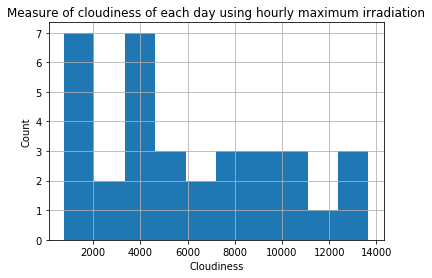

In [30]:
# plt.figure(figsize=(15, 10))
C_day_mod.hist()
plt.ylabel('Count')
plt.xlabel('Cloudiness')
plt.title('Measure of cloudiness of each day using hourly maximum irradiation')
plt.show() 

In [31]:
weather_maxirr_newer = pd.merge(weather_maxirr_new, C_day_mod, how='inner', on='DAY')
weather_maxirr_newer = weather_maxirr_newer.rename(columns={'mod_temp_offset_from_max_y': 'C_day_mod', 'mod_temp_offset_from_max_x': 'mod_temp_offset_from_max'})
weather_maxirr_newer

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0    2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1    2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2    2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3    2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4    2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   
...                  ...       ...              ...                  ...   
3177 2020-05-16 22:45:00   4135001  HmiyD2TTLFNqkNe            24.492981   
3178 2020-05-16 23:00:00   4135001  HmiyD2TTLFNqkNe            24.461625   
3179 2020-05-16 23:15:00   4135001  HmiyD2TTLFNqkNe            24.392568   
3180 2020-05-16 23:30:00   4135001  HmiyD2TTLFNqkNe            24.378021   
3181 2020-05-16 23:45:00   4135001  HmiyD2TTLFNqkNe            24.249347   

      MODULE_TEMPERATURE  IRRADIATION  DAY  TIME  HOUR  IRRADIATION_max  \
0              22.857507          0.0  136     0     0              0.0   
1              22.761668          0.0  136    15     0              0.0   
2              22.592306          0.0  136    30     0              0.0   
3              22.360852          0.0  136    45     0              0.0   
4              22.165423          0.0  136    60     1              0.0   
...                  ...          ...  ...   ...   ...              ...   
3177           22.052697          0.0  137  1365    22              0.0   
3178           22.186352          0.0  137  1380    23              0.0   
3179           22.202924          0.0  137  1395    23              0.0   
3180           22.112622          0.0  137  1410    23              0.0   
3181           21.814211          0.0  137  1425    23              0.0   

      MODULE_TEMPERATURE_max  AMBIENT_TEMPERATURE_max  \
0                  22.857507                25.184316   
1                  22.761668                25.084589   
2                  22.666227                24.935753   
3                  22.743333                24.846130   
4                  22.723669                24.621525   
...                      ...                      ...   
3177               23.560189                25.810259   
3178               23.815649                25.312602   
3179               23.300472                24.969698   
3180               23.077228                24.838093   
3181               23.051286                24.818829   

      irradiation_offset_from_max     C_day  mod_temp_offset_from_max  \
0                             0.0  5.856702                  0.000000   
1                             0.0  5.856702                  0.000000   
2                             0.0  5.856702                  0.005464   
3                             0.0  5.856702                  0.146292   
4                             0.0  5.856702                  0.311639   
...                           ...       ...                       ...   
3177                          0.0  5.654768                  2.272533   
3178                          0.0  5.654768                  2.654608   
3179                          0.0  5.654768                  1.204613   
3180                          0.0  5.654768                  0.930464   
3181                          0.0  5.654768                  1.530354   

        C_day_mod  
0     4039.270779  
1     4039.270779  
2     4039.270779  
3     4039.270779  
4     4039.270779  
...           ...  
3177  4953.798599  
3178  4953.798599  
3179  4953.798599  
3180  4953.798599  
3181  4953.798599  

[3182 rows x 16 columns]

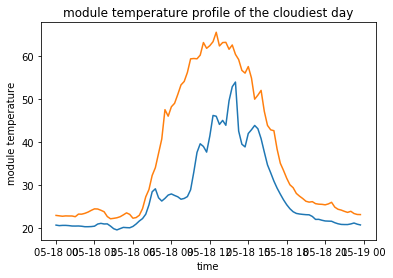

In [32]:
C_mod_max= weather_maxirr_newer[weather_maxirr_newer.C_day_mod==weather_maxirr_newer.C_day_mod.max()]
#plt.figure(figsize=(15, 10))
plt.plot(C_mod_max.DATE_TIME,C_mod_max.MODULE_TEMPERATURE)
plt.plot(C_mod_max.DATE_TIME,C_mod_max.MODULE_TEMPERATURE_max)
plt.ylabel('module temperature ')
plt.xlabel('time')
plt.title('module temperature profile of the cloudiest day')
plt.show() 

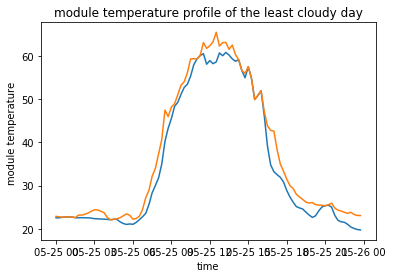

In [33]:
C_mod_min= weather_maxirr_newer[weather_maxirr_newer.C_day_mod==weather_maxirr_newer.C_day_mod.min()]
# plt.figure(figsize=(15, 10))
plt.plot(C_mod_min.DATE_TIME,C_mod_min.MODULE_TEMPERATURE)
plt.plot(C_mod_min.DATE_TIME,C_mod_min.MODULE_TEMPERATURE_max)
plt.ylabel('module temperature ')
plt.xlabel('time')
plt.title('module temperature profile of the least cloudy day')
plt.show() 

The module temperature of the day where c_day is a maximum, the profile of the module temperature of the day behaves very differently than the max curve,but when the c_day is minimum, the module temperature curve behaves more similarly to the max curve. So it looks like the C_day of the module temperature works.

Let's check with the correlation of the module temperature

In [34]:
mod_c = []
for a, b in weather_maxirr_newer.groupby(weather_maxirr_newer['DAY']):
    c = b['MODULE_TEMPERATURE'].corr(b['MODULE_TEMPERATURE_max'])
    mod_c.append(c)

mod_corr = pd.DataFrame(data=np.array(mod_c), columns=['mod_corr'])
mod_corr['DAY'] = weather_data['DAY'].unique()

weather_mod_corr=pd.merge(weather_maxirr_newer,mod_corr, how='inner', on='DAY')
weather_mod_corr.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1 2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2 2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3 2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4 2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  DAY  TIME  HOUR  IRRADIATION_max  \
0           22.857507          0.0  136     0     0              0.0   
1           22.761668          0.0  136    15     0              0.0   
2           22.592306          0.0  136    30     0              0.0   
3           22.360852          0.0  136    45     0              0.0   
4           22.165423          0.0  136    60     1              0.0   

   MODULE_TEMPERATURE_max  AMBIENT_TEMPERATURE_max  \
0               22.857507                25.184316   
1               22.761668                25.084589   
2               22.666227                24.935753   
3               22.743333                24.846130   
4               22.723669                24.621525   

   irradiation_offset_from_max     C_day  mod_temp_offset_from_max  \
0                          0.0  5.856702                  0.000000   
1                          0.0  5.856702                  0.000000   
2                          0.0  5.856702                  0.005464   
3                          0.0  5.856702                  0.146292   
4                          0.0  5.856702                  0.311639   

     C_day_mod  mod_corr  
0  4039.270779  0.976939  
1  4039.270779  0.976939  
2  4039.270779  0.976939  
3  4039.270779  0.976939  
4  4039.270779  0.976939

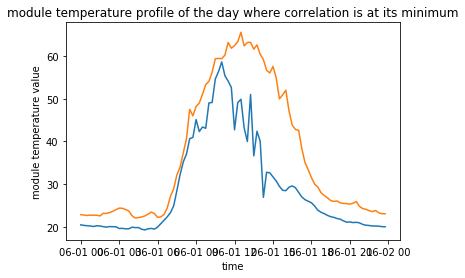

In [35]:
mod_corr_min= weather_mod_corr[weather_mod_corr.mod_corr==weather_mod_corr.mod_corr.min()]
# plt.figure(figsize=(15, 10))
plt.plot(mod_corr_min.DATE_TIME,mod_corr_min.MODULE_TEMPERATURE)
plt.plot(mod_corr_min.DATE_TIME,mod_corr_min.MODULE_TEMPERATURE_max)
plt.ylabel('module temperature value')
plt.xlabel('time')
plt.title('module temperature profile of the day where correlation is at its minimum')
plt.show()

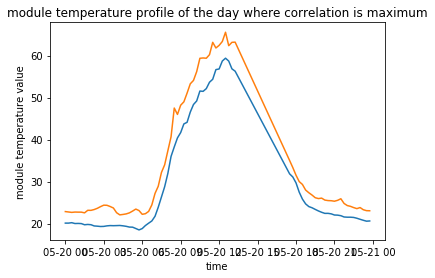

In [36]:
mod_corr_max= weather_mod_corr[weather_mod_corr.mod_corr==weather_mod_corr.mod_corr.max()]
# plt.figure(figsize=(15, 10))
plt.plot(mod_corr_max.DATE_TIME,mod_corr_max.MODULE_TEMPERATURE)
plt.plot(mod_corr_max.DATE_TIME,mod_corr_max.MODULE_TEMPERATURE_max)
plt.ylabel('module temperature value')
plt.xlabel('time')
plt.title('module temperature profile of the day where correlation is maximum')
plt.show()

There are missing values, so we sill use the day -1 of mod_corr_max

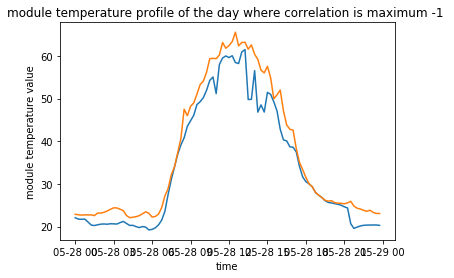

In [37]:
mod_corr_max_1= weather_mod_corr[weather_mod_corr.mod_corr<0.9879]
mod_corr_max_1=mod_corr_max_1[mod_corr_max_1.mod_corr>0.9875]

# plt.figure(figsize=(15, 10))
plt.plot(mod_corr_max_1.DATE_TIME,mod_corr_max_1.MODULE_TEMPERATURE)
plt.plot(mod_corr_max_1.DATE_TIME,mod_corr_max_1.MODULE_TEMPERATURE_max)
plt.ylabel('module temperature value')
plt.xlabel('time')
plt.title('module temperature profile of the day where correlation is maximum -1 ')
plt.show()

The module temperature of the day where the correlation is minimum, the profile of the module temperature of the day behaves very differently than the max curve. When the correlation is minimum -1, the module temperature curve does not behave as similarly to the max curve as expected. So it looks like the correlation of the module temperature does not work as good as the C_day in finding the level of cloudiness of the day.

# Task 5. Anomalies in energy conversion (with consideration of weather conditions)

### Plot irradiation vs AC power or DC power 

In [38]:
merged_df.head()

DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15     4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15     4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15     4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15     4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15     4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD  DAY_x  TIME_x  HOUR_x  PLANT_ID_y     SOURCE_KEY_y  \
0    6259559.0    136     0.0       0     4135001  HmiyD2TTLFNqkNe   
1    6183645.0    136    15.0       0     4135001  HmiyD2TTLFNqkNe   
2    6987759.0    136    30.0       0     4135001  HmiyD2TTLFNqkNe   
3    7602960.0    136    45.0       0     4135001  HmiyD2TTLFNqkNe   
4    7158964.0    136     0.0       0     4135001  HmiyD2TTLFNqkNe   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  DAY_y  TIME_y  HOUR_y  
0            25.184316           22.857507          0.0    136       0       0  
1            25.184316           22.857507          0.0    136       0       0  
2            25.184316           22.857507          0.0    136       0       0  
3            25.184316           22.857507          0.0    136       0       0  
4            25.184316           22.857507          0.0    136       0       0

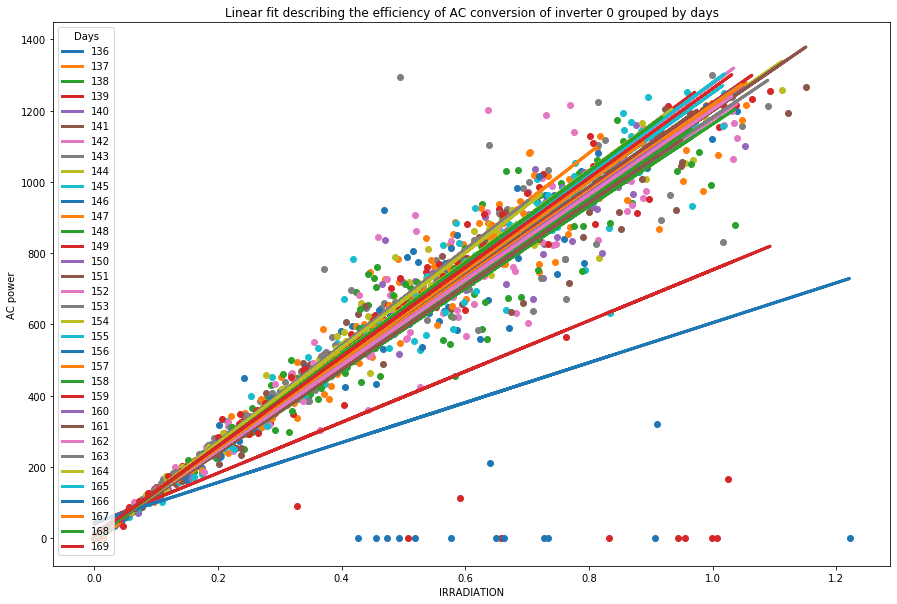

In [43]:
coeff=[]
inv0=merged_df[merged_df.SOURCE_KEY_x==merged_df.SOURCE_KEY_x[0]]
plt.figure(figsize=(15, 10))
for a, day in inv0.groupby(inv0.DAY_x):
    plt.scatter(day['IRRADIATION'], day['AC_POWER'])
    m, b = np.polyfit(day['IRRADIATION'], day['AC_POWER'], 1)
    plt.plot(day['IRRADIATION'], m*day['IRRADIATION'] + b, linewidth=3)
    coeff.append(m)
    coefficients = pd.DataFrame(data=np.array(coeff), columns=['lin_fit_coeff'])
coefficients['DAY'] = merged_df['DAY_x'].unique()
plt.legend(inv0.DAY_x.unique(), loc="upper left", title="Days")
plt.xlabel('IRRADIATION')
plt.ylabel('AC power')
plt.title("Linear fit describing the efficiency of AC conversion of inverter 0 grouped by days")
plt.show()

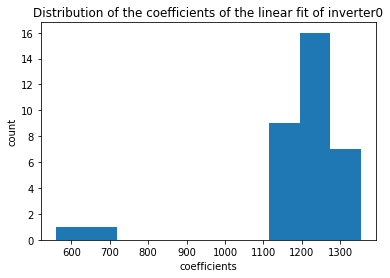

In [46]:
plt.hist(coeff)
plt.title('Distribution of the coefficients of the linear fit of inverter0')
plt.xlabel('coefficients')
plt.ylabel('count')
plt.show()

In [47]:
coefficients[coefficients.lin_fit_coeff<1000]

lin_fit_coeff  DAY
23     712.856665  159
30     560.326957  166

We can clearly see from both the histogram and the plot that there are two outliers, which are days 159 and 166

#### Investigation of day 159

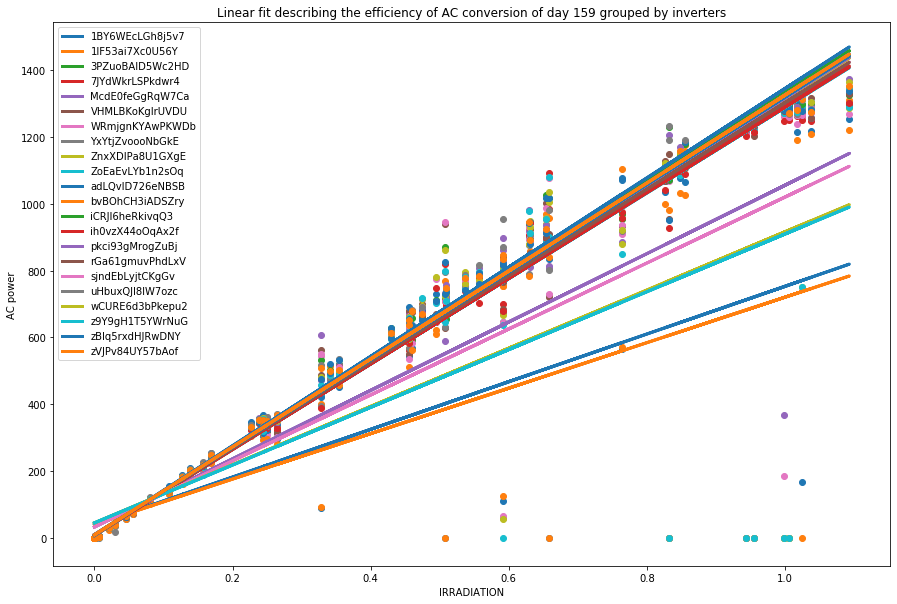

In [49]:
day159=merged_df[merged_df.DAY_x==159]
coeff=[]
inv=[]
plt.figure(figsize=(15, 10))
for i, source_key in day159.groupby(day159.SOURCE_KEY_x):
    plt.scatter(source_key.IRRADIATION,source_key.AC_POWER)
    m, b = np.polyfit(source_key['IRRADIATION'], source_key['AC_POWER'], 1)
    plt.plot(source_key['IRRADIATION'], m*source_key['IRRADIATION'] + b, linewidth=3)
    coeff.append(m)
plt.legend(day159.SOURCE_KEY_x.unique())
plt.xlabel('IRRADIATION')
plt.ylabel('AC power')
plt.title("Linear fit describing the efficiency of AC conversion of day 159 grouped by inverters")
plt.show()

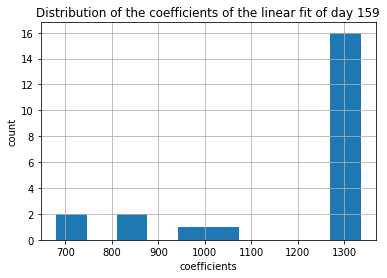

lin_fit_coeff         inverter
0      712.856665  1BY6WEcLGh8j5v7
4     1022.423429  McdE0feGgRqW7Ca
11     680.099085  iCRJl6heRkivqQ3
16     986.331717  uHbuxQJl8lW7ozc
18     870.395573  z9Y9gH1T5YWrNuG
19     863.871897  zBIq5rxdHJRwDNY

In [51]:
coefficients = pd.DataFrame(data=np.array(coeff), columns=['lin_fit_coeff'])
coefficients['inverter'] = merged_df['SOURCE_KEY_x'].unique()
coefficients.hist()
plt.title('Distribution of the coefficients of the linear fit of day 159')
plt.xlabel('coefficients')
plt.ylabel('count')
plt.show()
coefficients[coefficients.lin_fit_coeff<1100]

It looks like, those 6 inverters have had problems in converting the irradiation to AC power on day 159

#### Investigation of day 166

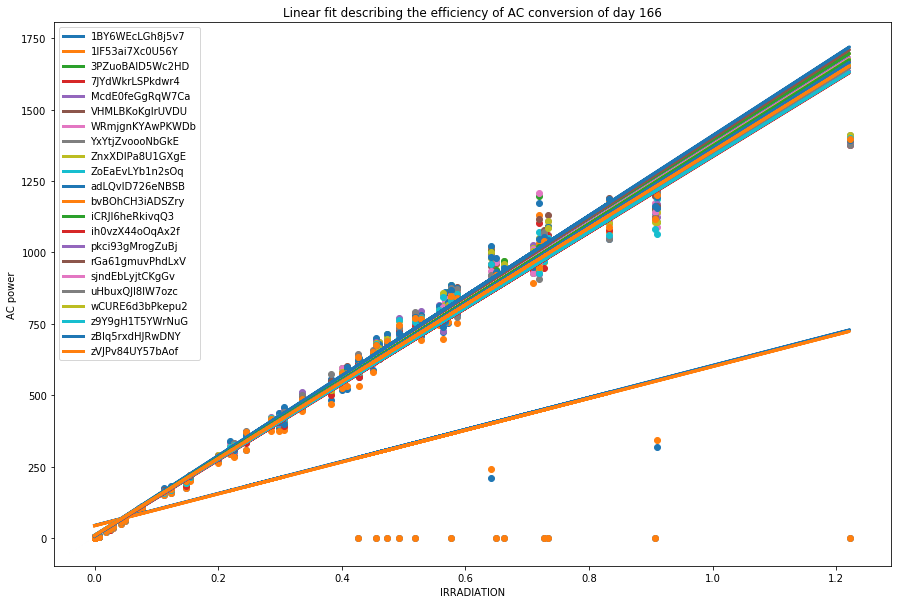

In [52]:
day166=merged_df[merged_df.DAY_x==166]
coeff=[]
inv=[]
plt.figure(figsize=(15, 10))
for i, source_key in day166.groupby(day166.SOURCE_KEY_x):
    plt.scatter(source_key.IRRADIATION,source_key.AC_POWER)
    m, b = np.polyfit(source_key['IRRADIATION'], source_key['AC_POWER'], 1)
    plt.plot(source_key['IRRADIATION'], m*source_key['IRRADIATION'] + b, linewidth=3)
    coeff.append(m)
plt.legend(day166.SOURCE_KEY_x.unique())
plt.xlabel('IRRADIATION')
plt.ylabel('AC power')
plt.title("Linear fit describing the efficiency of AC conversion of day 166")
plt.show()

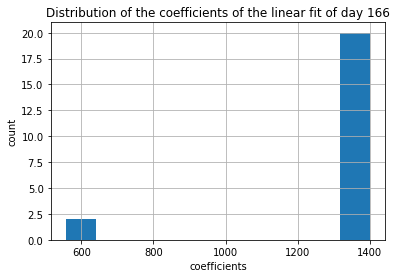

lin_fit_coeff         inverter
0      560.326957  1BY6WEcLGh8j5v7
11     557.220432  iCRJl6heRkivqQ3

In [53]:
coefficients = pd.DataFrame(data=np.array(coeff), columns=['lin_fit_coeff'])
coefficients['inverter'] = merged_df['SOURCE_KEY_x'].unique()
coefficients.hist()
plt.title('Distribution of the coefficients of the linear fit of day 166')
plt.xlabel('coefficients')
plt.ylabel('count')
plt.show()
coefficients[coefficients.lin_fit_coeff<1100]

The two inverters had malfunctions in converting the irradiation to AC power on day 166, and those inverters had malfunctions on day 159 too.

## Write a function that given an inverter value and the dataframe overplots the linear fits and returns the coefficients.

In [55]:
def Irr_ac_linear_fit(data, inverter):
    coeff=[]
    inv_data=data[data.SOURCE_KEY_x==data.SOURCE_KEY_x[inverter]]
    plt.figure(figsize=(15, 10))
    for a, day in inv_data.groupby(inv_data.DAY_x):
        plt.scatter(day['IRRADIATION'], day['AC_POWER'])
        m, b = np.polyfit(day['IRRADIATION'], day['AC_POWER'], 1)
        plt.plot(day['IRRADIATION'], m*day['IRRADIATION'] + b, linewidth=3)
        coeff.append(m)
        coefficients = pd.DataFrame(data=np.array(coeff), columns=['lin_fit_coeff'])
    plt.title("Linear fit of inverter "+str(inverter)+": "+str(data.SOURCE_KEY_x[inverter]))
    coefficients['DAY'] = data['DAY_x'].unique()
    plt.legend(inv_data.DAY_x.unique(), loc="upper left", title="Days")
    plt.xlabel('IRRADIATION')
    plt.ylabel('AC power')
    plt.show()
    coefficients.lin_fit_coeff.hist()
    plt.title('Distribution of the coefficients of the linear fit of inverter '+str(data.SOURCE_KEY_x[inverter]))
    plt.xlabel('coefficients')
    plt.ylabel('count')
    plt.show()
    return(coefficients)

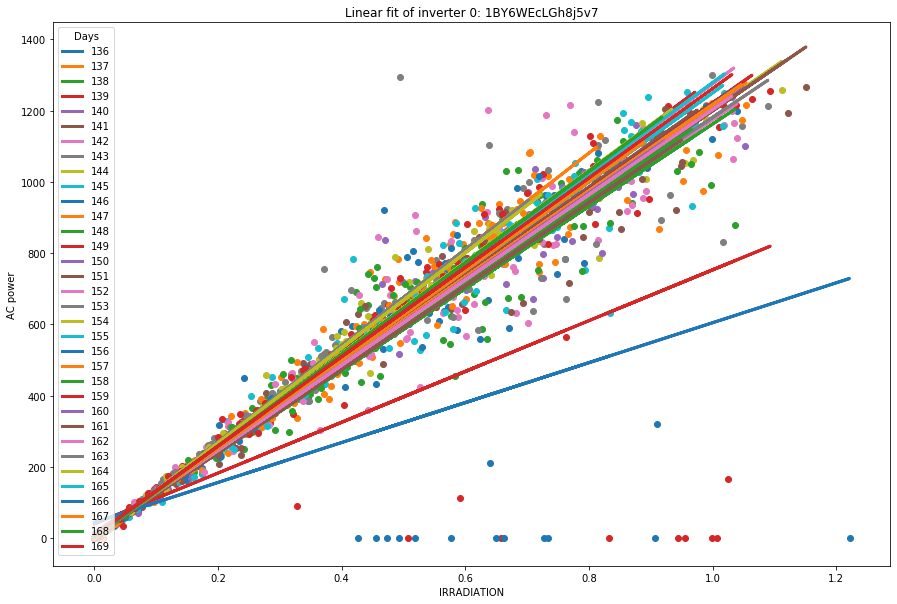

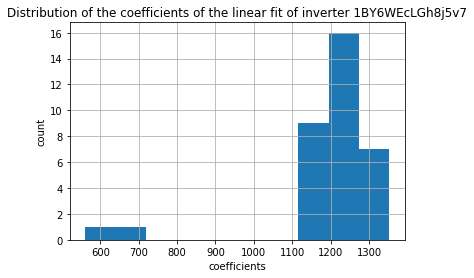

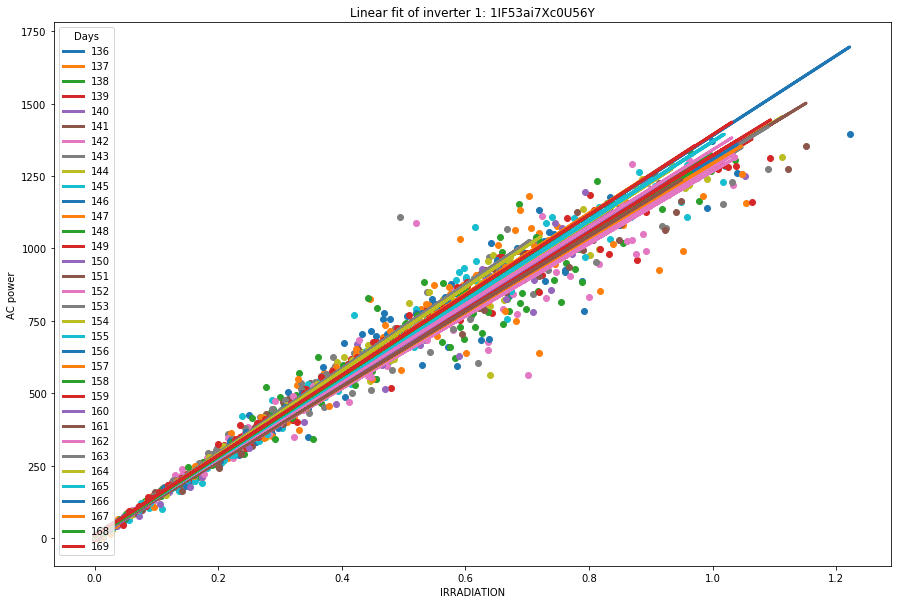

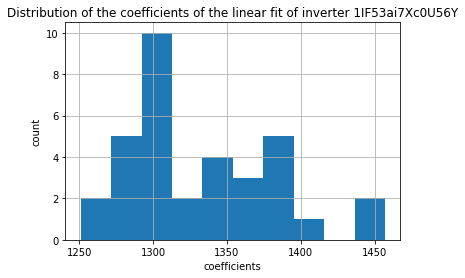

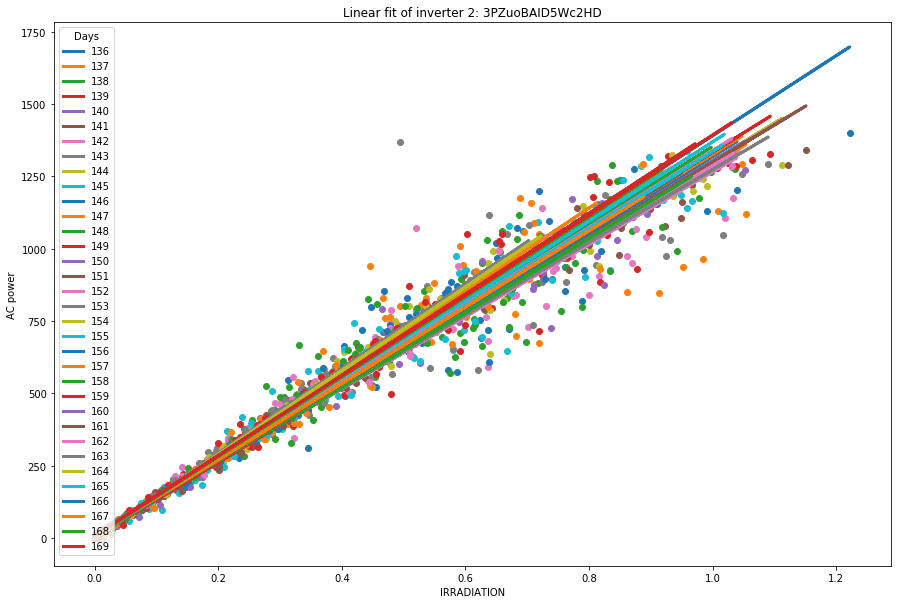

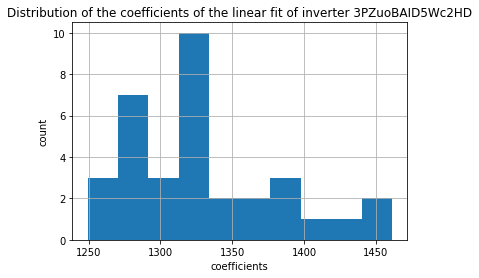

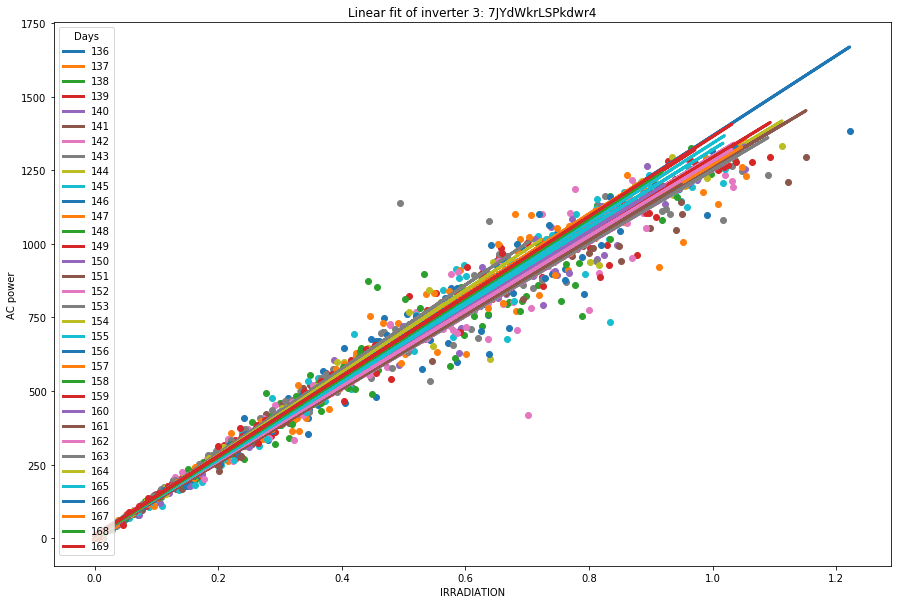

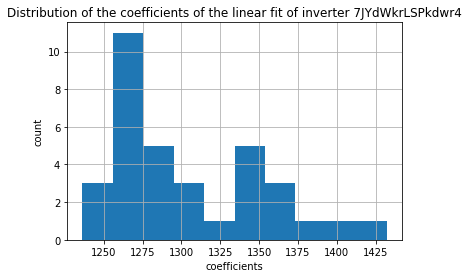

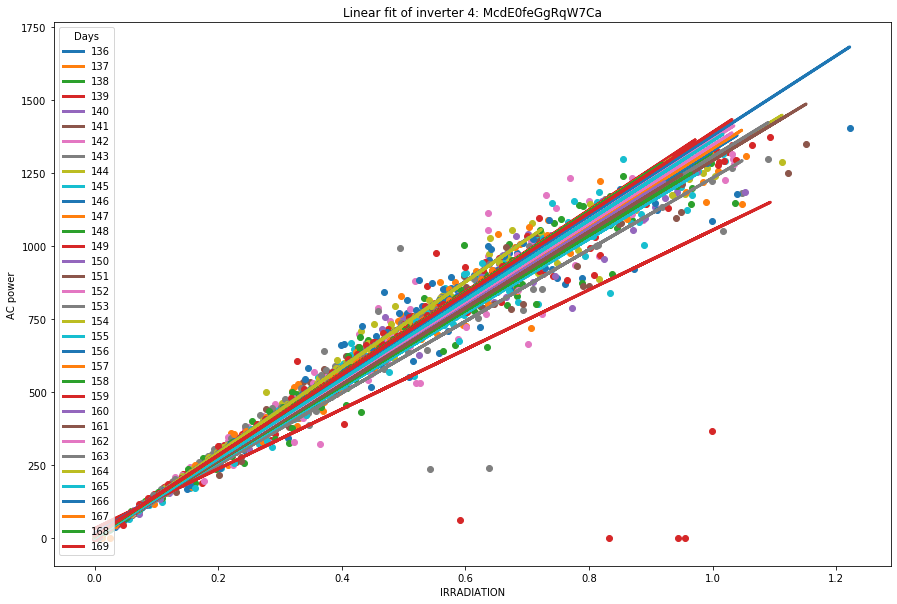

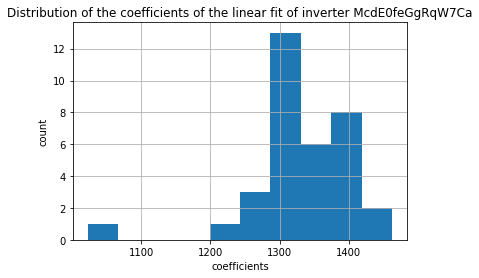

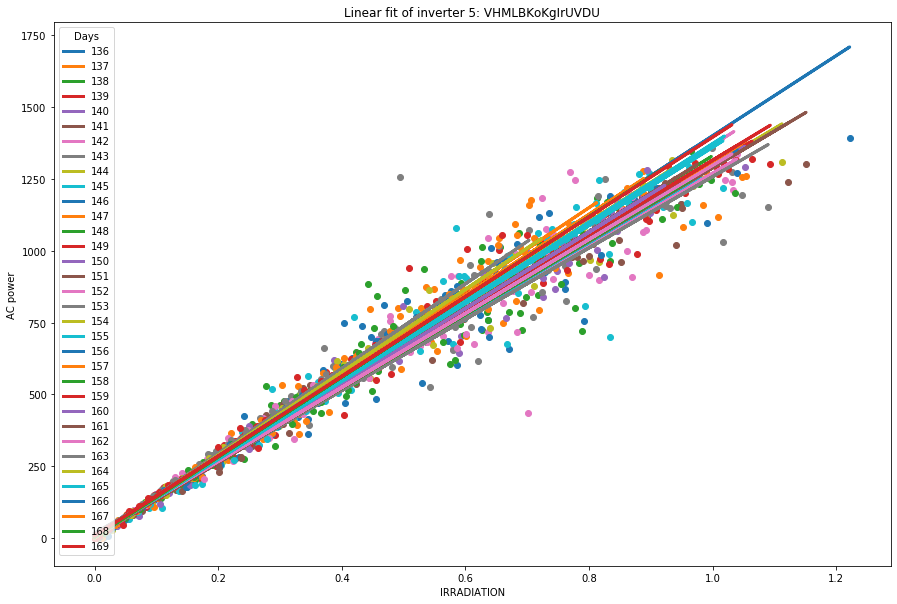

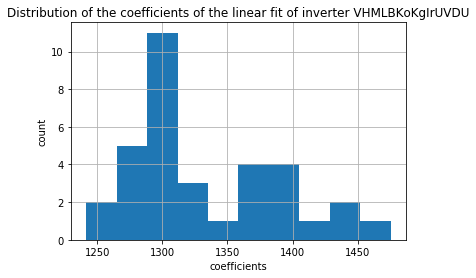

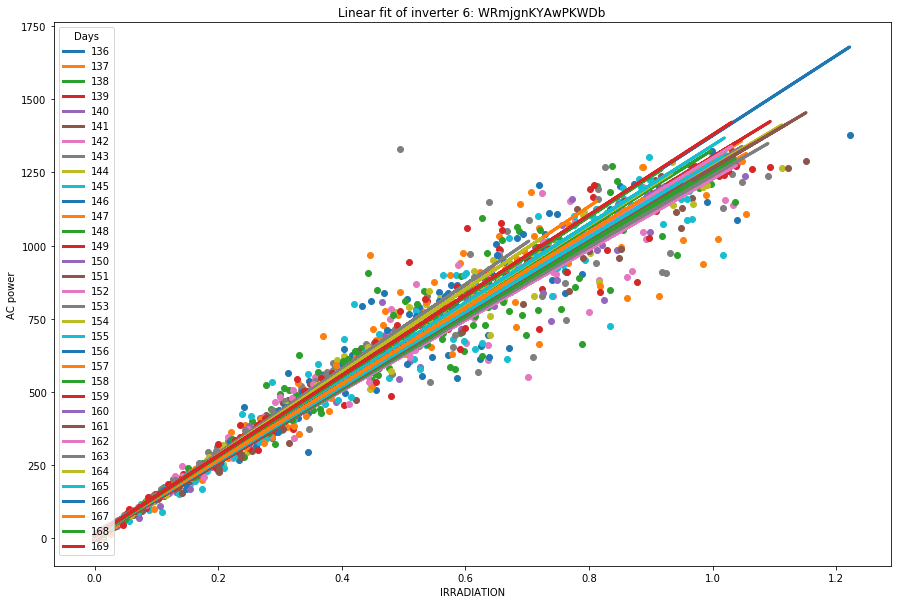

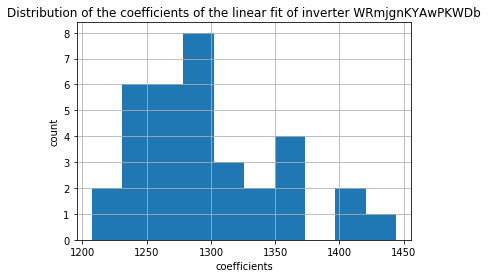

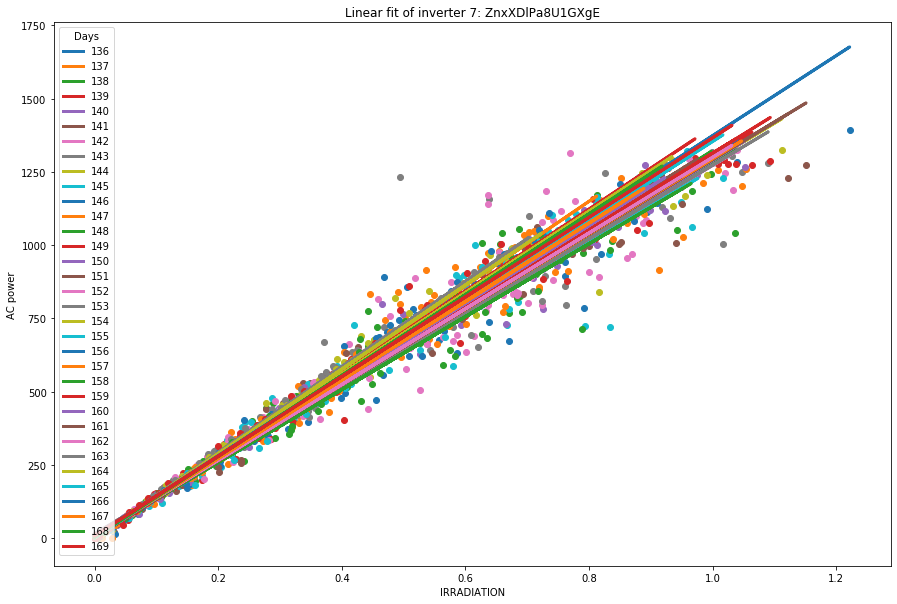

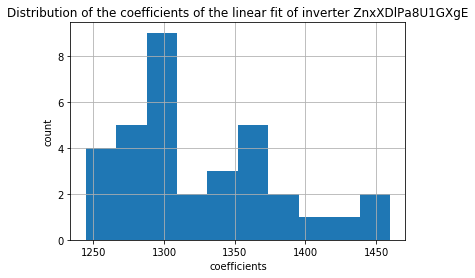

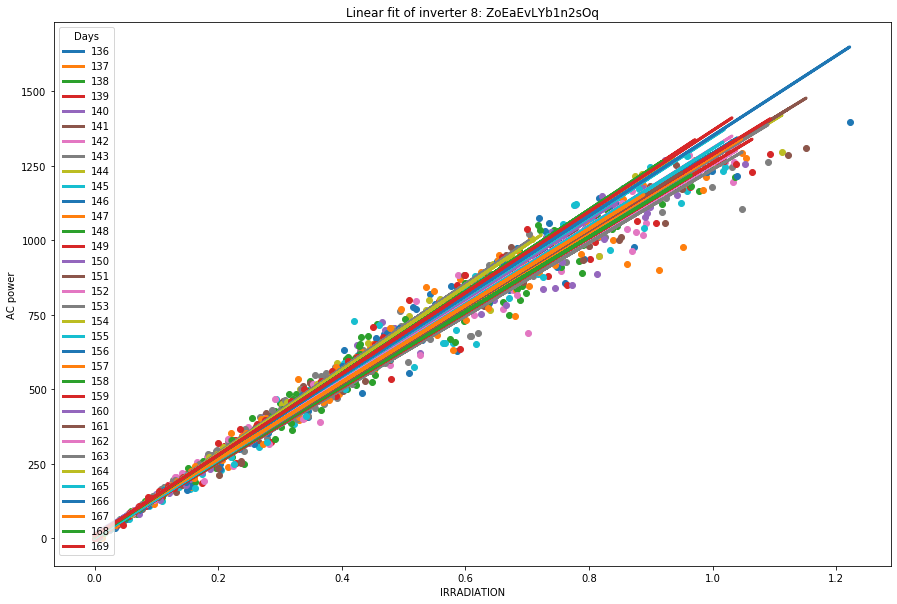

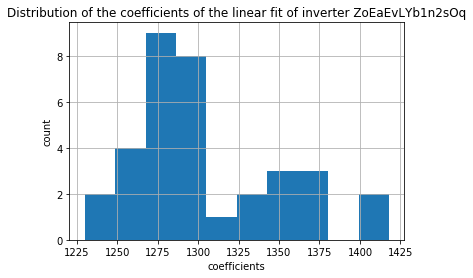

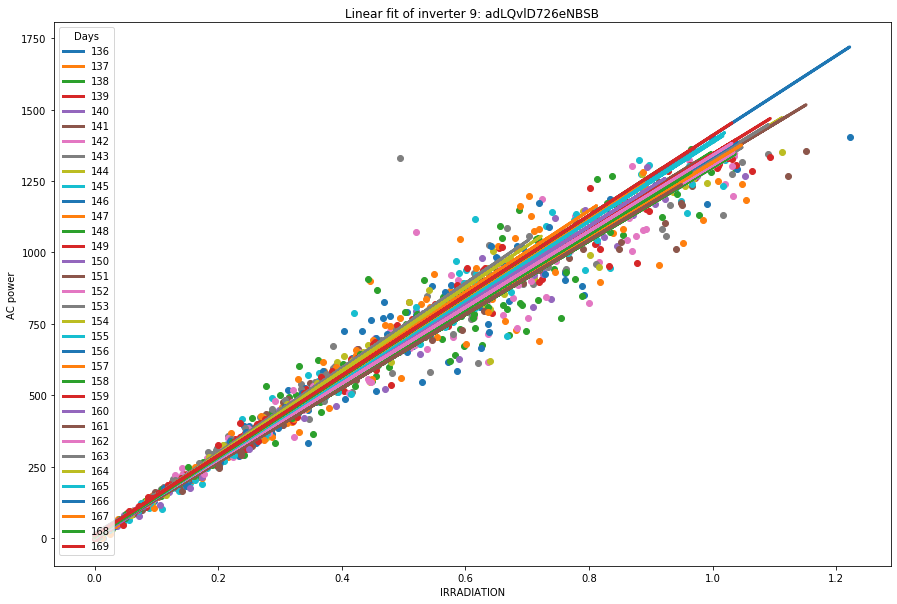

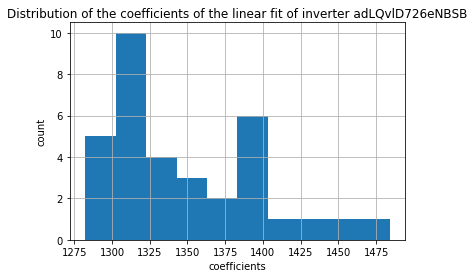

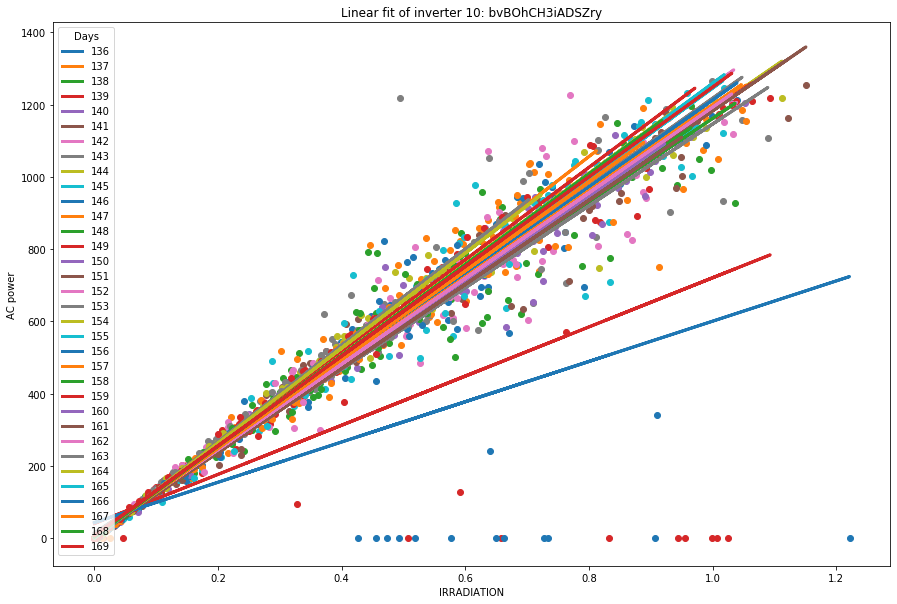

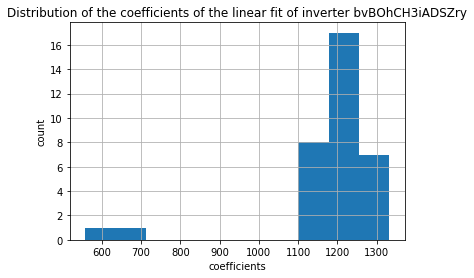

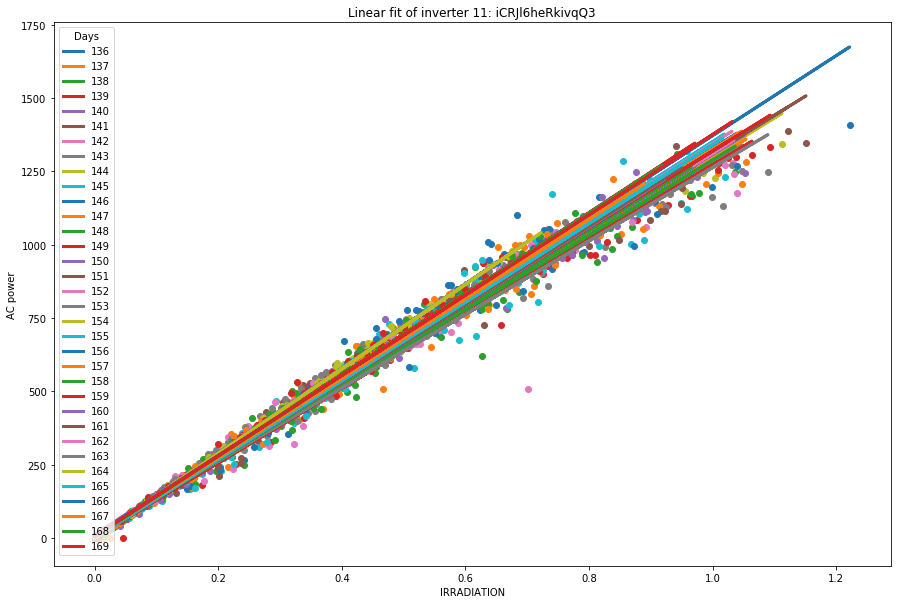

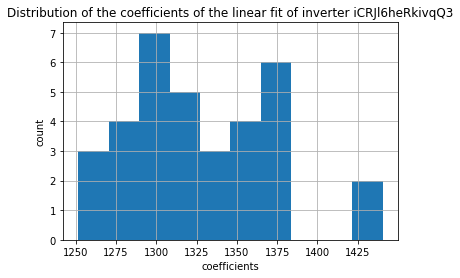

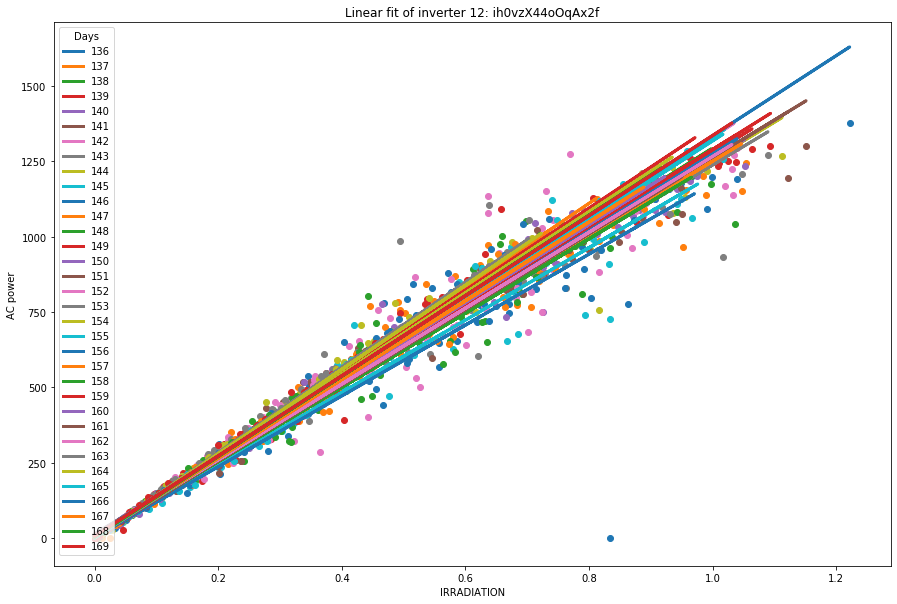

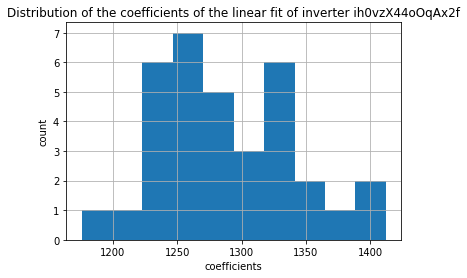

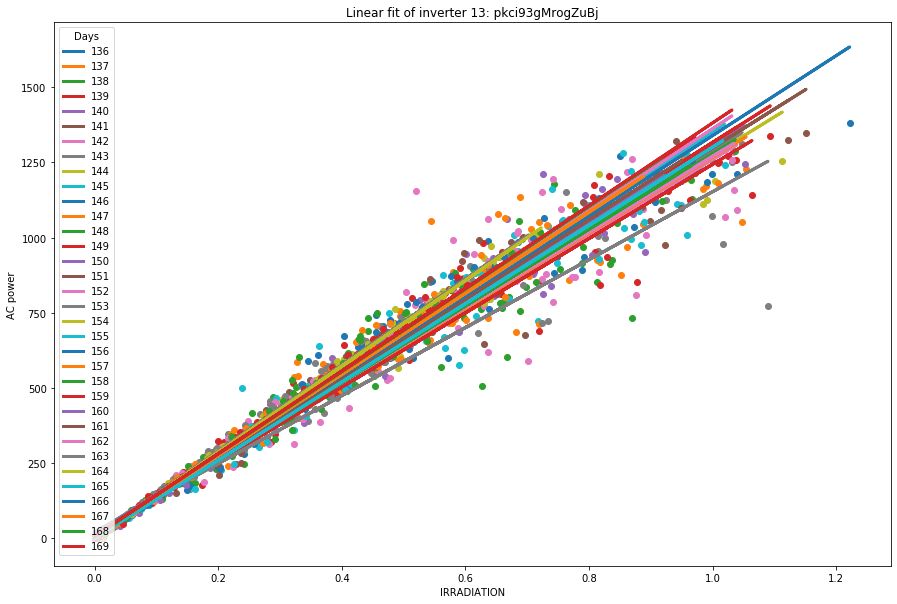

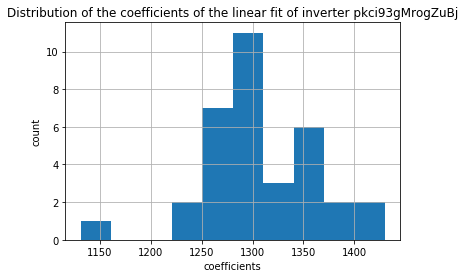

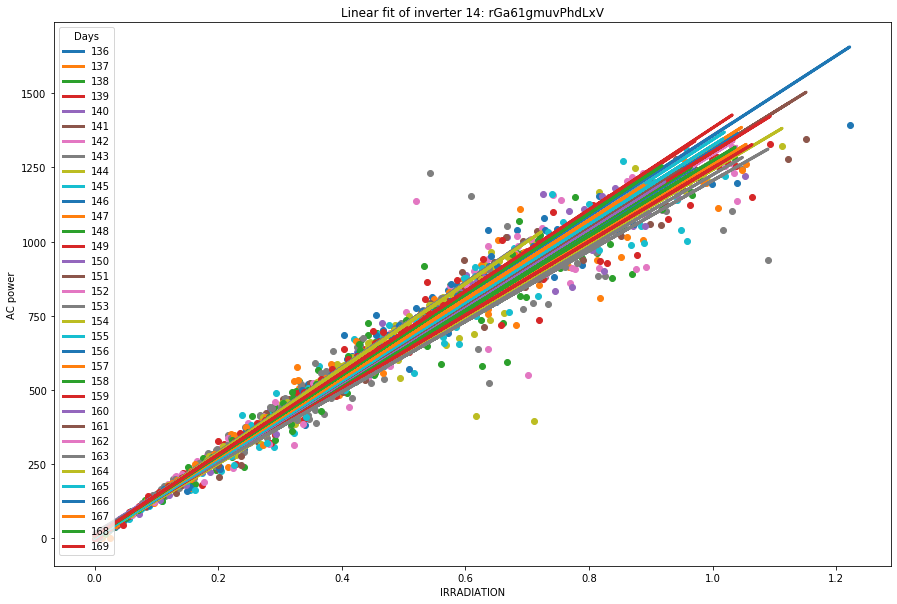

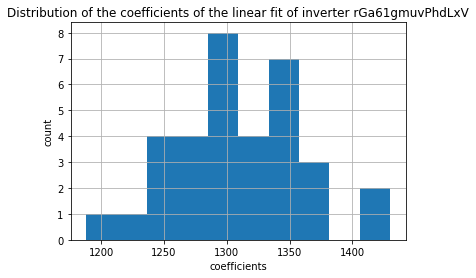

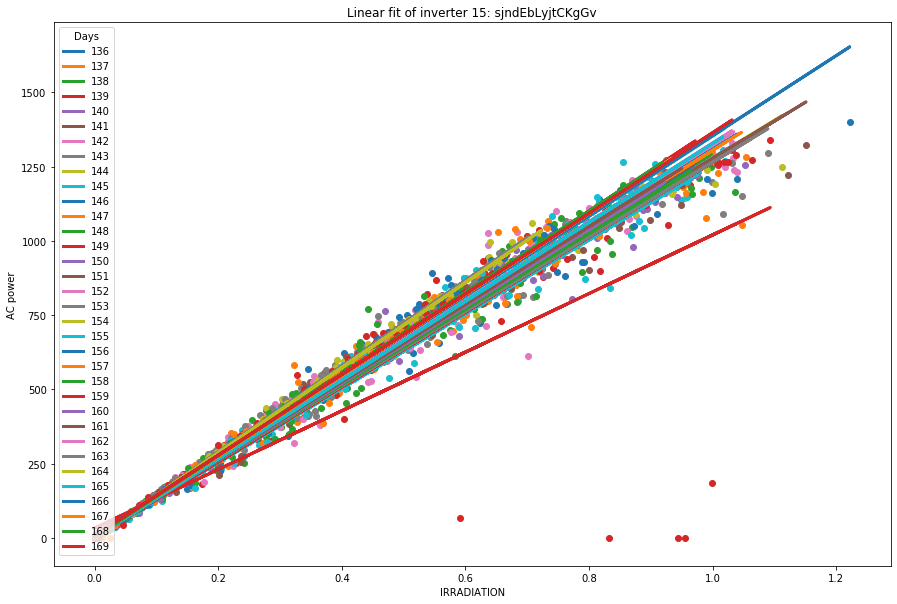

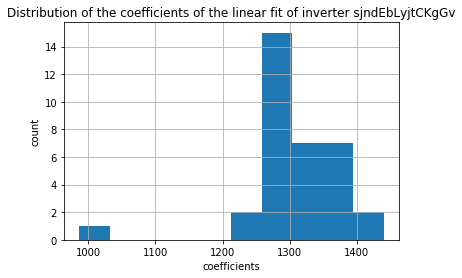

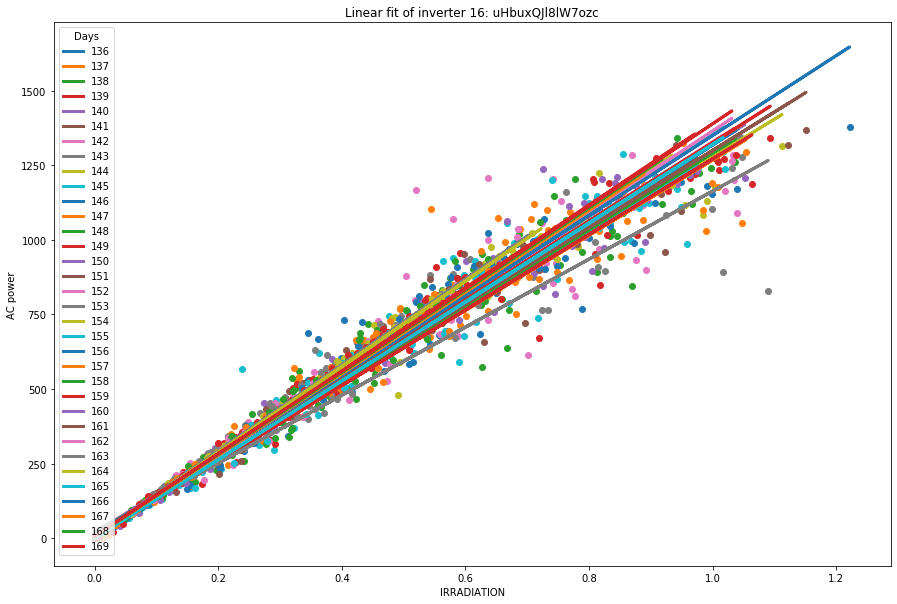

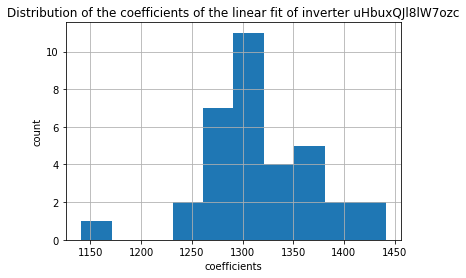

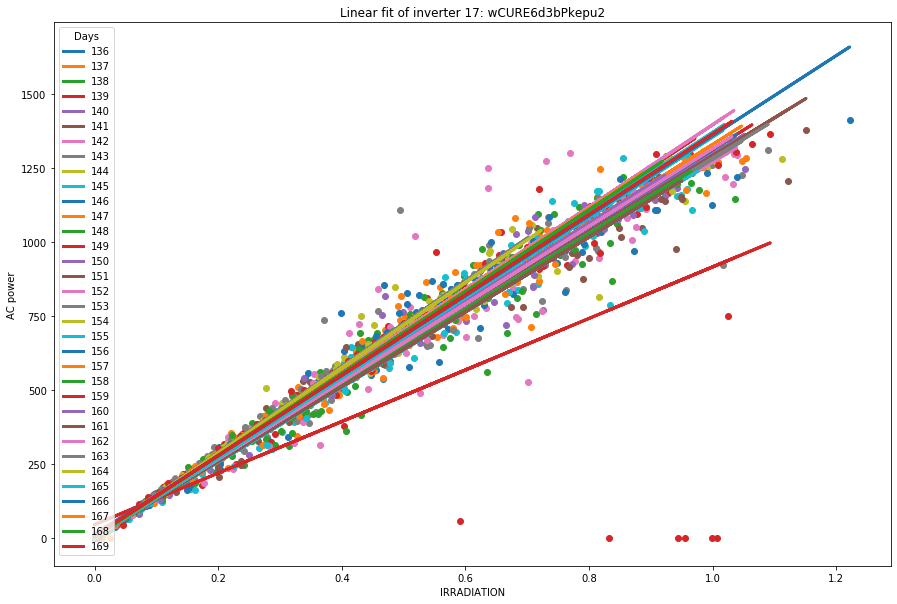

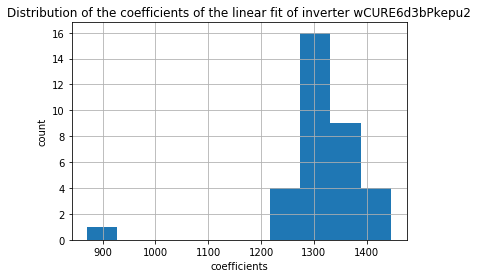

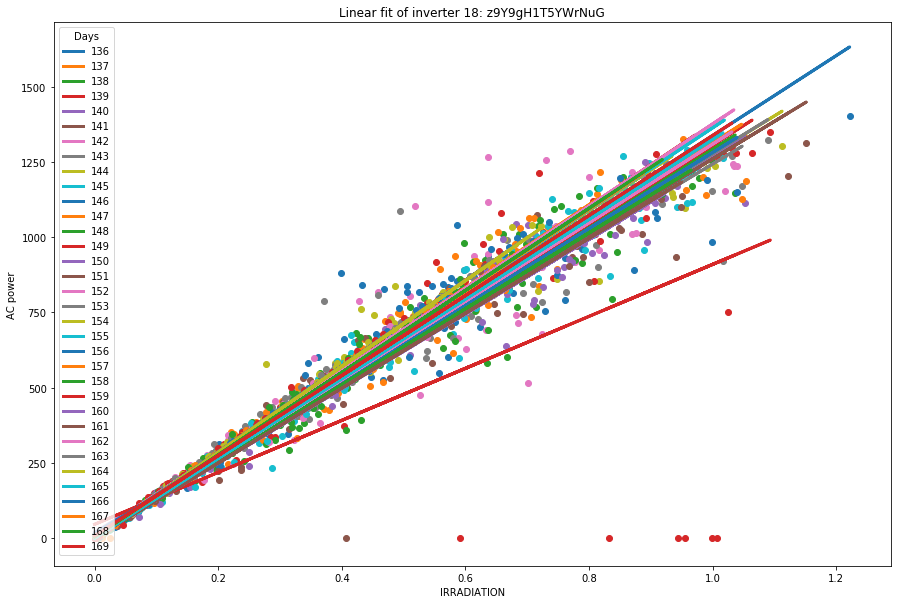

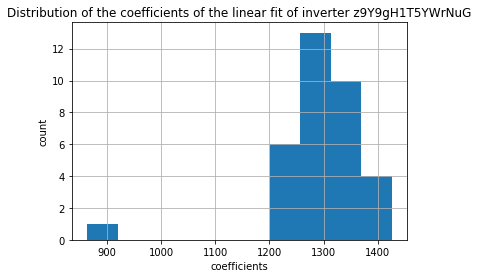

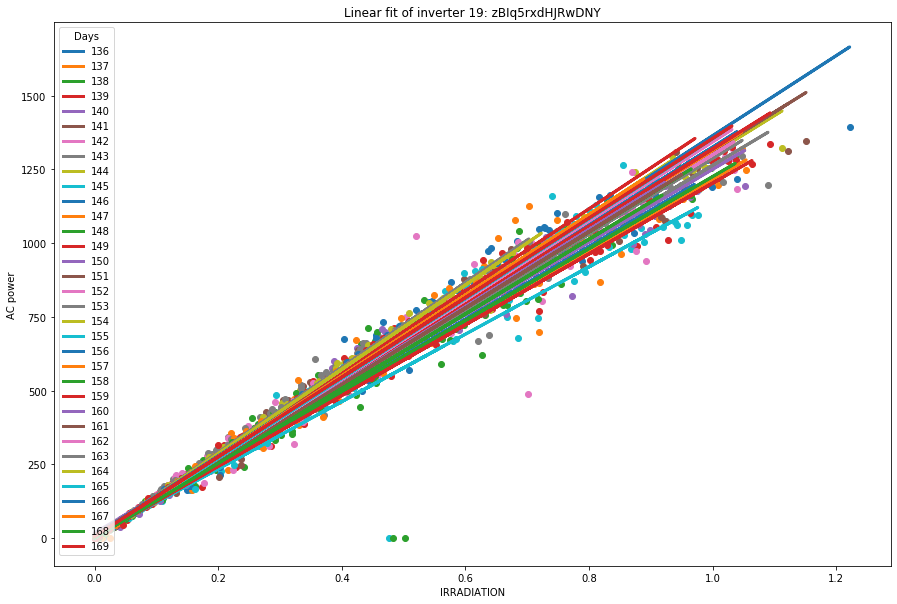

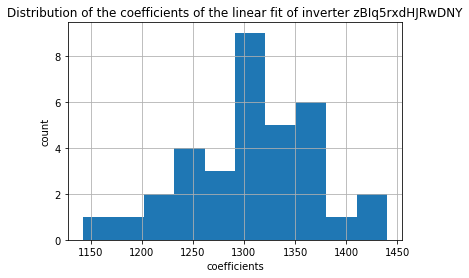

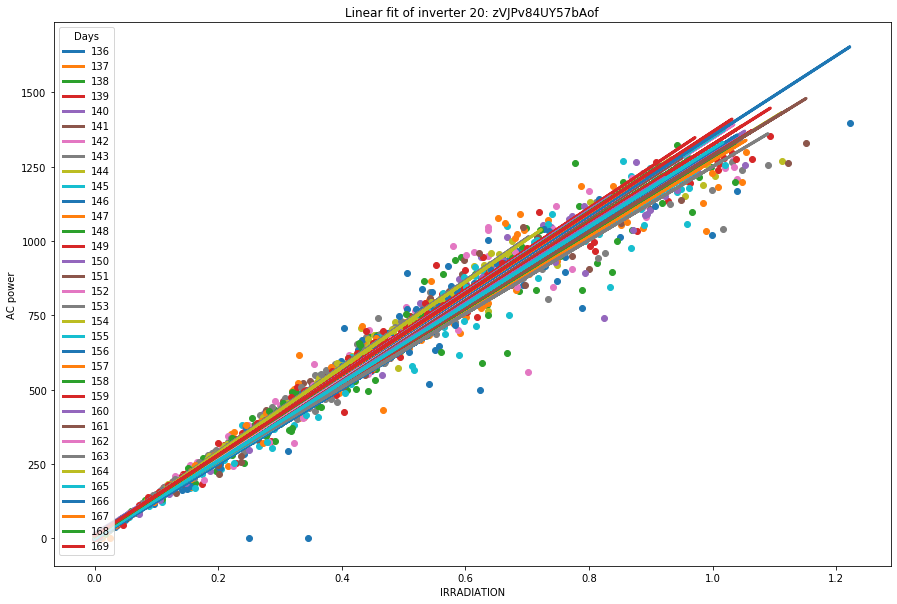

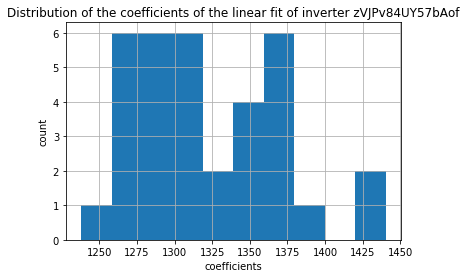

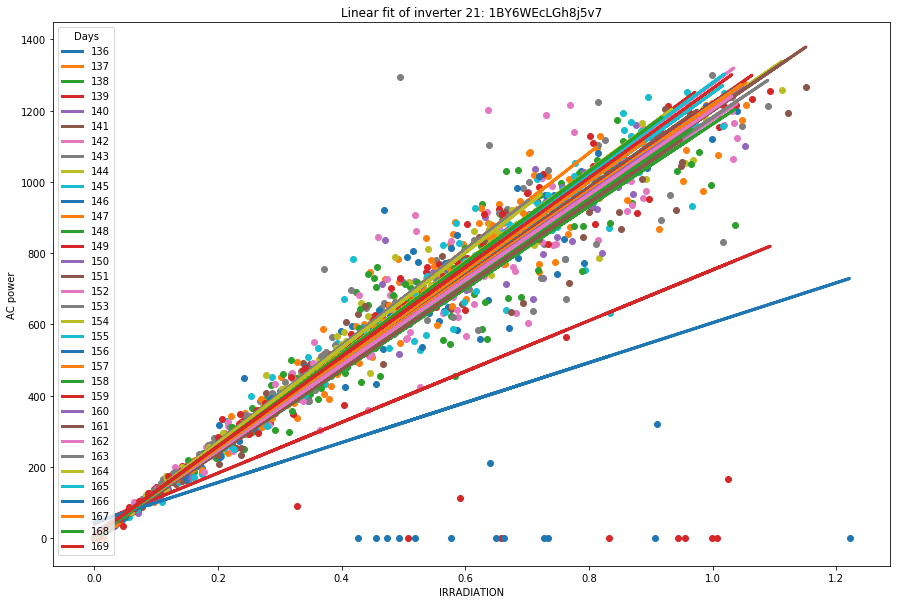

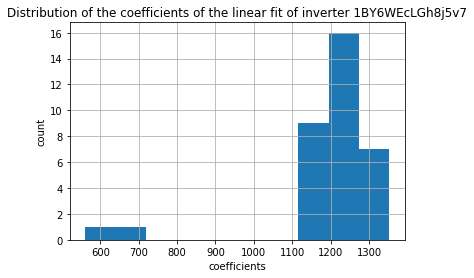

In [56]:
for i in range(merged_df.SOURCE_KEY_x.nunique()):
    Irr_ac_linear_fit(merged_df, i)